# PCA Analysis for TRAPseq Data
#### Tommy Tang 
#### Nov 11, 2025

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler

In [ ]:
#Get Data for l300, d150, d819, l114, l311, l314, l450
df1 = pd.read_excel('../Data/D150_IP vs. L3_IP_TRAP_simplified_2 (3).xlsx', sheet_name=0)
df2 = pd.read_excel('../Data/D819_IP_vs_L450_IP_TRAP_simplified.xlsx', sheet_name=0)
df3 = pd.read_excel('../Data/D819_IP_vs_L450_IP_TRAP_simplified.xlsx', sheet_name=1)
df4 = pd.read_excel('../Data/L114_IP_vs_L3_11_vs_L3_14.xlsx', sheet_name=0)

In [38]:
#Merge all dataframes on 'Name'
df_merged = pd.merge(df4, pd.merge(df3,pd.merge(df1, df2, on='Name', how='inner'), on='Name', how='inner'), on='Name', how='inner')
#Take only TPM columns
df_merged_TPM = df_merged[[col for col in df_merged.columns if 'TPM' in col]]

In [90]:
#Make list of sample names
sample_names = df_merged_TPM.columns.tolist()
sample_names = [name[0:4] for name in sample_names]
sample_names

['L114', 'L311', 'L314', 'D819', 'L300', 'D150', 'L450']

### Standardized Data

In [137]:
#Data Standardization
print("Before Scaling:")
print(df_merged_TPM.describe())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_merged_TPM)
df_scaled = pd.DataFrame(df_scaled, columns=df_merged_TPM.columns)
df_scaled.columns = df_merged_TPM.columns

print("\nAfter Scaling:") 
print(df_scaled.describe())

Before Scaling:
           L114 TPM      L311 TPM      L314 TPM      D819 TPM      L300 TPM  \
count  31555.000000  31555.000000  31555.000000  31555.000000  31555.000000   
mean      31.689485     31.689881     31.689598     31.690166     31.690385   
std      328.387828    634.613178    747.451302    410.820221    192.620361   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.486784      0.459167      0.441522      0.362751      0.505582   
75%       10.129966     11.231158     10.354214      9.267425     12.086384   
max    32270.154227  66941.673453  77538.919357  31536.231209   8629.172307   

           D150 TPM      L450 TPM  
count  31555.000000  31555.000000  
mean      31.690230     31.689809  
std      593.907933    242.145431  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.521814      0.572188  
75%        8.576161 

In [138]:
#PCA Transformation
model = PCA(n_components=3)
transformed = model.fit_transform(df_scaled.T)
df_pca = pd.DataFrame(transformed, columns=['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,7.954043,18.550481,-32.145542
1,60.106991,-46.726076,-12.292020
2,65.295214,-43.558949,-12.657111
3,11.133246,89.560340,54.573678
4,-131.853395,-73.294626,30.559001
5,64.902238,-6.003054,21.543564
6,-77.538336,61.471884,-49.581570


In [ ]:
#Examine explained variance
explained_variance = model.explained_variance_ratio_
print(f"\nExplained variance by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var*100:.2f}%")
print(f"Total explained variance: {sum(explained_variance)*100:.2f}%")


Explained variance by each component:
PC1: 51.35%
PC2: 31.14%
PC3: 11.77%
Total explained variance: 94.26%


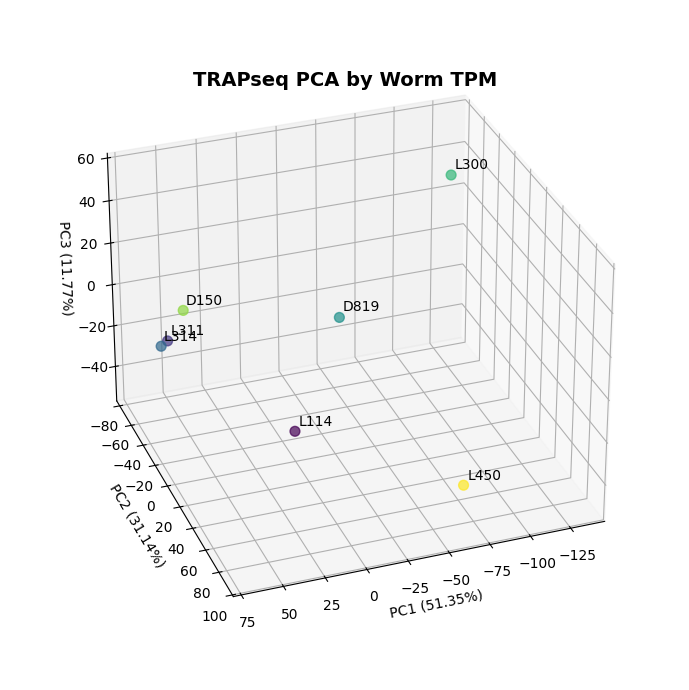

In [140]:
#Plot PCA
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], s=50, alpha=0.7, c=range(len(transformed)), cmap='viridis')
# Add sample labels
for idx, sample in enumerate(sample_names):
    ax.text(df_pca['PC1'].iloc[idx], df_pca['PC2'].iloc[idx] + 5, df_pca['PC3'].iloc[idx] + 5, sample, fontsize=10)
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}%)')
ax.set_box_aspect(None, zoom=0.9)
ax.view_init(elev=30, azim=70)
ax.set_title('TRAPseq PCA by Worm TPM', y=0.95, loc='center', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('../Figures/All Worms/TRAPseq_3D_PCA.png', dpi=300)
plt.show()

### Log-Transformed Data

           L114 TPM      L311 TPM      L314 TPM      D819 TPM      L300 TPM  \
count  31555.000000  31555.000000  31555.000000  31555.000000  31555.000000   
mean      -2.266645     -2.356101     -2.337803     -2.359437     -2.269576   
std        3.801306      3.859051      3.829181      3.790534      3.848470   
min       -7.000000     -7.000000     -7.000000     -7.000000     -7.000000   
25%       -7.000000     -7.000000     -7.000000     -7.000000     -7.000000   
50%       -0.312664     -0.338029     -0.355048     -0.440391     -0.296208   
75%        1.005608      1.050425      1.015117      0.966959      1.082296   
max        4.508801      4.825697      4.889520      4.498810      3.935969   

           D150 TPM      L450 TPM  
count  31555.000000  31555.000000  
mean      -2.331154     -2.271161  
std        3.790659      3.844746  
min       -7.000000     -7.000000  
25%       -7.000000     -7.000000  
50%       -0.282484     -0.242462  
75%        0.933293      1.076489  


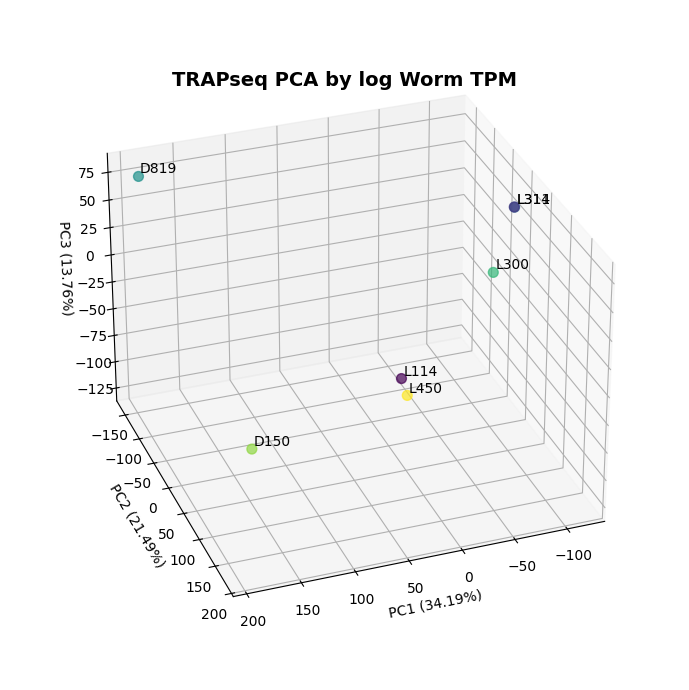

In [147]:
#Log Transform
df_log = df_merged_TPM.map(lambda x: np.log10(x+0.0000001))

#PCA Transformation
model = PCA(n_components=3)
transformed = model.fit_transform(df_log.T)
df_pca = pd.DataFrame(transformed, columns=['PC1', 'PC2', 'PC3'])
print(df_log.describe())

#Examine explained variance
explained_variance = model.explained_variance_ratio_
print(f"\nExplained variance by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var*100:.2f}%")
print(f"Total explained variance: {sum(explained_variance)*100:.2f}%")

#Plot PCA
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], s=50, alpha=0.7, c=range(len(transformed)), cmap='viridis')
# Add sample labels
for idx, sample in enumerate(sample_names):
    ax.text(df_pca['PC1'].iloc[idx], df_pca['PC2'].iloc[idx] + 5, df_pca['PC3'].iloc[idx] + 5, sample, fontsize=10)
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}%)')
ax.set_box_aspect(None, zoom=0.9)
ax.view_init(elev=30, azim=70)
ax.set_title('TRAPseq PCA by log Worm TPM', y=0.95, loc='center', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('../Figures/All Worms/TRAPseq_3D_log_PCA.png', dpi=300)
plt.show()